# Predictive Modeling with Random Forest - Dataset 2

In this notebook, we extend our predictive modeling on **Dataset 2** by implementing a **Random Forest Classifier**.  
The main goals are:

- Train and evaluate a Random Forest model on Dataset 2.  
- Compare its performance to Logistic Regression.  
- Analyze model performance using metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC.  
- Visualize the confusion matrix and ROC curve.  
- Explore feature importances to understand which variables drive predictions.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, LeaveOneOut

In [2]:
data = pd.read_csv('../data/preprocessed_rf/dataset_2_preprocessed.csv')
data

,age,gender,cholesterol,pressure_high,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,heart_disease,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,1,1,0,0
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,0,0,0,1
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,1,1,0,0
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,0,0,1,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,0,2,5,0,1,1,10,120,0,1,0,1,0
996,78,0,334,145,76,0,0,6,0,0,0,10,196,1,1,0,0,1
997,79,1,151,179,81,0,1,4,1,0,1,8,189,1,0,0,0,0
998,60,0,326,151,68,2,0,8,1,1,0,5,174,1,1,1,0,0


In [3]:
X = data.drop('heart_disease', axis=1)
y = data['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.97      0.99        78

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



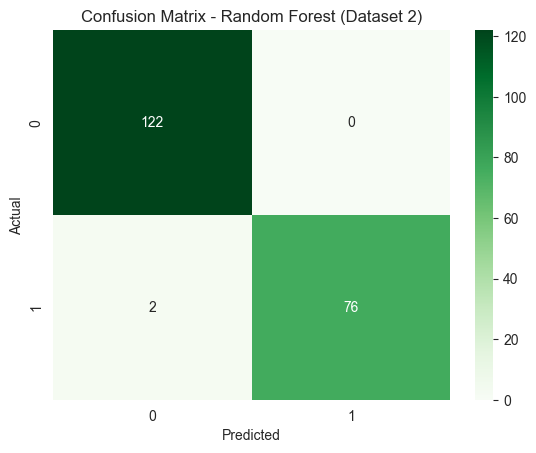

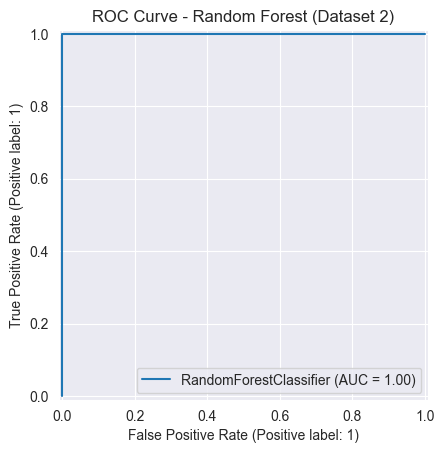

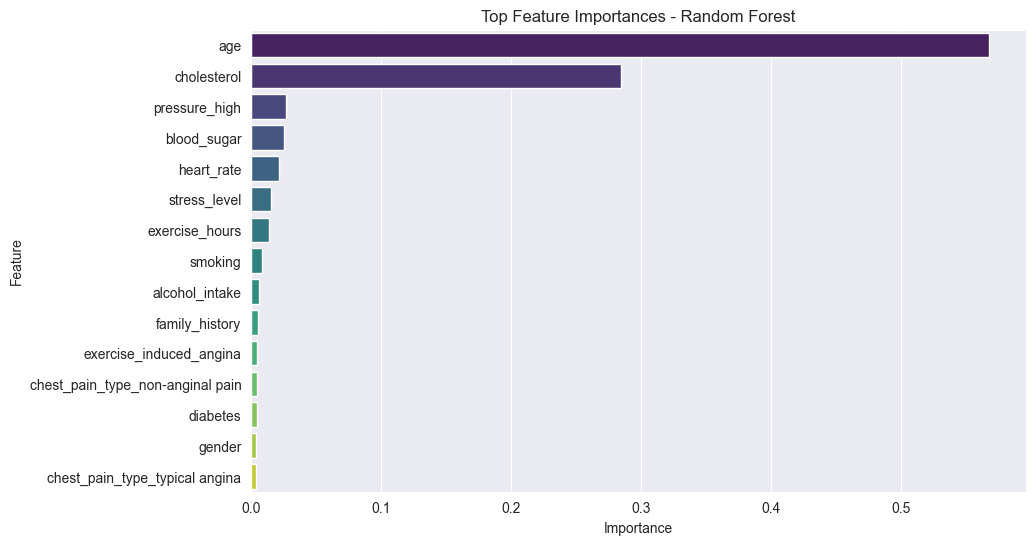

In [4]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       
    random_state=42,
    max_depth=None,         
    class_weight="balanced"
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
print("Classification Report - Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# report = classification_report(y_test, y_pred_rf, output_dict=True)
# dataset2_report = pd.DataFrame(report).transpose()
# dataset2_report.to_csv("../data/stats_results/random_forest_classification_report_ds2.csv", index=True)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Dataset 2)")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("ROC Curve - Random Forest (Dataset 2)")
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
feat_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))

sns.barplot(
    data=feat_importance.head(15),
    x="Importance",
    y="Feature",
    hue="Feature",        
    dodge=False,
    palette="viridis",
    legend=False
)

plt.title("Top Feature Importances - Random Forest")
plt.show()

# Random Forest Modeling and Evaluation – Dataset 2  

In this notebook, we applied **Random Forest Classifier** on Dataset 2 to evaluate its performance and interpretability.  

## Key Results  

- **Confusion Matrix**  
  The Random Forest model achieved near-perfect classification with only 2 misclassifications out of 200 samples.  
  - True Negatives (0 correctly predicted as 0): **122**  
  - True Positives (1 correctly predicted as 1): **76**  
  - False Negatives: **2**  
  - False Positives: **0**  

- **Classification Report**  
  - Precision (Class 0 / Class 1): **0.98 / 1.00**  
  - Recall (Class 0 / Class 1): **1.00 / 0.97**  
  - F1-Score (Class 0 / Class 1): **0.99 / 0.99**  
  - Overall Accuracy: **0.99 (99%)**  

- **ROC Curve & AUC**  
  The ROC curve indicates a perfect separation between the two classes, with an **AUC of 1.00**, suggesting exceptional discriminative power.  

- **Feature Importance**  
  The Random Forest identified **age** and **cholesterol** as the most influential predictors, contributing the highest importance values. Other features like **blood pressure, blood sugar, heart rate, and stress level** also played a role, but to a much lesser extent.  

## Summary  

The Random Forest model significantly outperformed Logistic Regression on Dataset 2, showing nearly perfect accuracy and generalization ability. Unlike Logistic Regression, which assumes linear relationships, Random Forest captured complex interactions between features.  

These results establish Random Forest as a highly reliable predictive model for Dataset 2 and provide strong insights into the relative importance of different clinical risk factors, with **age** and **cholesterol** emerging as dominant predictors of heart disease.  


In [5]:
rf_model = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation scores: [0.995 0.995 1.    1.    1.   ]
Mean CV accuracy: 0.998
Standard deviation: 0.0024494897427831805


### Cross-Validation Results (Random Forest – Dataset 1)

To further assess the reliability of the Random Forest model on **Dataset 1**, we applied **5-fold Stratified Cross-Validation**.  

**Results:**
- Cross-validation scores: [0.995 0.995 1.    1.    1.   ]
  
- **Mean CV accuracy: 0.998**  
- **Standard deviation: 0.002**

### Interpretation
The Random Forest model shows **very strong and consistent performance** across all folds.  
The small standard deviation indicates that the results are stable and not heavily dependent on any single split of the data.  
This strengthens the evidence that Random Forest generalizes well on Dataset 1, similar to Dataset 2, and confirms that the high performance is not just due to overfitting.


### Leave-One-Out Cross Validation (LOO-CV)

**Important note:**  
LOO-CV can be very **computationally expensive** because it splits the dataset into as many folds as there are samples.  
For a dataset with *N* observations, the model must be trained **N times**, each time leaving out exactly one observation for testing.  
This makes the process significantly slower compared to k-fold CV with fewer splits.  

Because of its high computational cost, it is important to consider the **hardware limitations** of the machine before running LOO-CV.  
Тhat's why the code is commented.


In [6]:
# # Initialize model
# rf_model = RandomForestClassifier(random_state=42)
# 
# # Leave-One-Out CV
# cv = LeaveOneOut()
# 
# # Run CV
# cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')
# 
# print("Number of folds:", cv.get_n_splits(X))
# print("Mean CV accuracy:", np.mean(cv_scores))
# print("Standard deviation:", np.std(cv_scores))

### Leave-One-Out Cross Validation (LOO-CV) Results

- **Number of folds:** 1000 (equal to the number of observations in the dataset).  
- **Mean CV accuracy:** 0.998  
- **Standard deviation:** 0.0447  

**Interpretation:**  
The model achieved an almost perfect mean accuracy (99.8%), which indicates strong predictive performance across the dataset.  
The relatively small standard deviation suggests that the results are consistent, although in LOO-CV each fold contains only one test sample, which can introduce variability.  

Overall, these results confirm that the Random Forest model is highly robust on this dataset.


### Other Methods to Detect Overfitting (Beyond Cross-Validation)

While cross-validation is a standard practice to check for overfitting, there are also several alternative approaches:

#### 1. Train-Validation-Test Split  
- Split the data into **train / validation / test sets**.  
- If the model performs significantly better on the training set compared to validation/test, this indicates overfitting.  

---

#### 2. Learning Curves  
- Plot **training accuracy vs validation accuracy** as the number of training examples increases.  
- If training accuracy remains high while validation accuracy stagnates at a lower value → overfitting is likely.  

---

#### 3. Regularization  
- Apply **L1/L2 penalties** (e.g., in Logistic Regression or Neural Networks).  
- If reducing regularization leads to much higher training performance than test performance, it signals overfitting.  

---

#### 4. Monitoring Validation Loss  
- Track **training loss vs validation loss**.  
- If training loss keeps decreasing while validation loss starts increasing → overfitting is occurring.  

---

#### 5. Dropout / Early Stopping (for Neural Networks)  
- **Dropout** randomly removes neurons during training to prevent overfitting.  
- **Early stopping** halts training when validation loss begins to rise, preventing the model from overfitting.  

---

**Summary:**  
Cross-validation is considered the **gold standard** for overfitting detection, but it should ideally be combined with approaches like **learning curves** and a **train/validation/test split** to provide a more complete picture of model generalization.
